## Python Language Basics

### A Simple Python Program
Write a python program to print all prime numbers smaller than 20.

In [ ]:
# prints prime numbers smaller than 20
for num in range(2, 20):
    is_prime = True            # assume num is prime, unless...
    for div in range(2, num):
        if num % div == 0:
            is_prime = False
    if is_prime:
        print(num)

#### The same code in C++
```C++
int main() {
    for (int num = 2; num < 20; num++) {
        bool is_prime = true;
        for (int div = 2, div < num; div++)
            if (num % div == 0)
                is_prime = false;
        if (is_prime)
            cout << num;
}
```

* Indentation vs. curly braces
* No need to declare variables
* `range(2, 20)` and `for` loop syntax
* No need for parentheses in `if` and `for`
* `print` function

### Ranges

`range(a, b)` denotes the numbers between `a` and `b-1`, inclusive.

| Range  | Elements in the Range |
|:-------|:--------------------|
| range(2, 20) | 2, 3, ..., 19 |
| range(20) | 0, 1, 2, ..., 19 |
| range(0, 20, 2) | 0, 2, 4, ..., 18 |
| range(2, 2) | *nothing* |
| range(2, 1) | *nothing* |
| range(5, 2, -1) | 5, 4, 3 |


### Defining Functions
Using functions, make this code more modular:
```Python
# prints prime numbers smaller than 20
for num in range(2, 20):
    is_prime = True            # assume num is prime, unless...
    for div in range(2, num):
        if num % div == 0:
            is_prime = False
    if is_prime:
        print(num)
```

In [ ]:
def is_prime(n):
    for div in range(2, n):
        if n % div == 0:
            return False
    return True

# prints prime numbers smaller than 20
for num in range(2, 20):
    if is_prime(num):
        print(num)

* `def` defines a function
* `return` returns the function result
* Parameters are untyped
* We encounter runtime error if sending in a non-number:

In [49]:
is_prime(23)

True

In [294]:
%timeit is_prime(1000001)

6.58 µs ± 164 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Type Checking in Python

* Python is a typed language,
* But not **statically** typed
  * i.e., types of the variables is not known from the program text
  
```Python
if (x > 0):
    y = x + 1
else:
    y = "Invalid Input!"
```
* Not a good practice to mix types this way!

### Type Checking in Python

In [50]:
is_prime("23")

TypeError: 'str' object cannot be interpreted as an integer

In [51]:
type(23)

int

In [52]:
type("23")

str

### Using Lists
Write a function to return all prime numbers less than a bound.

In [53]:
def primes_smaller_than(bound):
    result = []
    for num in range(2, bound):
        if is_prime(num):
            result.append(num)
    return result

* `[]` denotes an empty list
* `append` appends an element to a list


In [54]:
primes_smaller_than(20)

[2, 3, 5, 7, 11, 13, 17, 19]

In [55]:
type(primes_smaller_than(20))

list

### Objects and Method Calls
* Lists are *objects*
* The way to talk to objects is: `obj.method(params)` e.g., `primes.append(num)`
* To find out the methods an object supports, use tab-completion:
```python
primes.<Press Tab>
               append()  count()   insert()  reverse()
               clear()   extend()  pop()     sort()
               copy()    index()   remove()
```
* Objects can be used as function parameters too:
```python
a_list = [1, 3, 4]
len(a_list)
```

**We will see more about lists shortly.**

## Visualizing the Results


### Counting Primes
Return the number of primes smaller than a bound.

In [56]:
def count_primes_smaller_than(bound):
    count = 0
    for num in range(2, bound):
        if (is_prime(num)):
            count = count + 1
    return count

In [57]:
count_primes_smaller_than(20)

8

In [ ]:
for num in range(10, 1000, 50):
    print(num, count_primes_smaller_than(num))

In [59]:
index = []
primes = []
for num in range(10, 1000, 20):
    index.append(num)
    primes.append(count_primes_smaller_than(num))


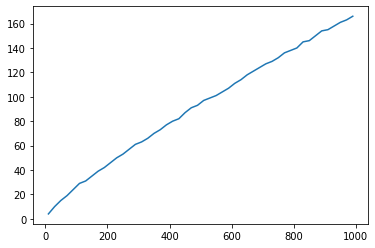

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
    
plt.plot(index, primes)

## String Processing

### String Literals
```python
a = 'one way of writing a string'
b = "another way"
c = """
This is a longer string that
spans multiple lines
"""
```

### Basic Strings Operations
```
"Hello" + "World"  =>  "HelloWorld"       (Concatenation)
"Hello" * 3        =>  "HelloHelloHello"  (Repetition)
len("Hello")       =>  5                  (Size)
"Hello" < "Jello"  =>  True               (Comparison)
"el" in "Hello"    =>  True               (Search)
```

### String Indexing

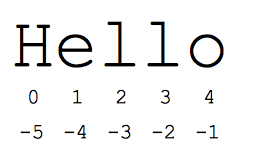


In [63]:
s = "Hello"
print(s[0])
print(s[-1])

H
o


### String Slicing

```
Index from rear:    -5  -4  -3  -2  -1
Index from front:    0   1   2   3   4
                   +---+---+---+---+---+
                   | H | e | l | l | o |
                   +---+---+---+---+---+
Slice from front:  :   1   2   3   4   :
Slice from rear:   :  -4  -3  -2  -1   :

s[1:4]   =>  "ell"
s[1:]    =>  "ello"
s[:3]    =>  "Hel"
s[1:-2]  =>  "el"
```

## Predictive Text Problem
<img src="./images/Predict.jpeg" width="300px"/>


*P*( *word* | *history* )  

*P*( *the* | *It's water is so transparent that* ) =  
    *C*( *It's water is so transparent that the* ) / *C*( *It's water is so transparent that* )




## N-grams
>Peter Piper picked a peck of pickled peppers;  
A peck of pickled peppers Peter Piper picked.  
If Peter Piper picked a peck of pickled peppers,  
Where’s the peck of pickled peppers Peter Piper picked?

* 1-grams (unigrams): "*Peter*", "*Piper*", "*picked*", ...
* 2-grams (bigrams): "*Peter Piper*", "*Piper picked*", ...
* 3-grams (trigrams): "*Peter Piper picked*", "*peck of pickled*", ...
* ...


## Problem: Building a Bigram Model

Peter Piper picked a peck of pickled peppers;  
A peck of pickled peppers Peter Piper picked.  
If Peter Piper picked a peck of pickled peppers,  
Where’s the peck of pickled peppers Peter Piper picked?

## Problem: Building a Bigram Model

**Step 1. Tokenize the input text:**
```
["Peter", "Piper", "picked" ...]
```

**Step 2. Count the bigrams:**
```
('peter', 'piper') ==> 4
('picked', 'a') ==> 2
('picked', 'if') ==> 1
...
```

**Step 3. Construct a (Simple) Language Model:**
```
'peter' ==> {'piper': 1}
'picked' ==> {'peter': 0.25, 'a': 0.5, 'if': 0.25}
...
```

### Step 1 - Tokenizing the Input Text
Break the input string into separate words, removing the ending punctuations.

In [64]:
# The first version does not remove punctuations
def tokenize(s):
    words = s.split()
    return words

tokenize("Hello, dear stranger!")

['Hello,', 'dear', 'stranger!']

In [65]:
# This function does not work correctly!
def tokenize(s):
    words = s.split()
    for word in words:
        word.rstrip(";.,?!")
    return words

tokenize("Hello, dear stranger!")

['Hello,', 'dear', 'stranger!']

### Strings are Immutable! (Unlike Lists)

In [66]:
s = "Hello,"
print(s.rstrip(","))
print(s)

Hello
Hello,


In [67]:
s = "Hello,"
print(s[0])
s[0] = 'h'

H


TypeError: 'str' object does not support item assignment

### Solving the Problem

In [69]:
def tokenize(s):
    words = s.split()
    result = []
    for word in words:
        result.append(word.rstrip(";.,?!"))
    return result

tokenize("Hello, dear stranger!")

['Hello', 'dear', 'stranger']

In [70]:
def tokenize(s):
    words = s.split()
    result = []
    for word in words:
        result.append(word.rstrip(";.,?!").lower())
    return result

tokenize("Hello, dear stranger!")

['hello', 'dear', 'stranger']

In [71]:
rhyme = """
Peter Piper picked a peck of pickled peppers;  
A peck of pickled peppers Peter Piper picked.  
If Peter Piper picked a peck of pickled peppers,  
Where’s the peck of pickled peppers Peter Piper picked?
"""
tokenize(rhyme)

['peter',
 'piper',
 'picked',
 'a',
 'peck',
 'of',
 'pickled',
 'peppers',
 'a',
 'peck',
 'of',
 'pickled',
 'peppers',
 'peter',
 'piper',
 'picked',
 'if',
 'peter',
 'piper',
 'picked',
 'a',
 'peck',
 'of',
 'pickled',
 'peppers',
 'where’s',
 'the',
 'peck',
 'of',
 'pickled',
 'peppers',
 'peter',
 'piper',
 'picked']

## More About Lists

The types of the elements need not be the same:
* `a = [99, "bottles of milk", ["on", "the", "wall"]]`

Same operators as for strings:
* `a+b, a*3, a[0], a[-1], a[1:], len(a)`

Other operations:

|   Operation           |   a            | Result   |
|:----------------      |:---------------|:--------:|
| `a = list(range(5))`  | `[0,1,2,3,4]`  |          |
| `a.append(5)`         | `[0,1,2,3,4,5]`|          |
| `a.pop()`             | `[0,1,2,3,4]`  | `5`      |
| `a.insert(1, 8)`      | `[0,8,1,2,3,4]`|          |
| `a.pop(0)`            | `[8,1,2,3,4]`  | `0`      |
| `a.reverse()`         | `[4,3,2,1,8]`  |          |
| `a.sort()`            | `[1,2,3,4,8]`  |          |


In [72]:
a = list(range(5))
a.append(5)
a.pop()
a.insert(1, 8)
a.pop(0)
a.reverse()
a.sort()
a

[1, 2, 3, 4, 8]

### Manipulating List Items

In [73]:
a = [99, "bottles of milk", ["on", "the", "wall"]]
a[0] = 98
a

[98, 'bottles of milk', ['on', 'the', 'wall']]

In [74]:
del a[-1]
a

[98, 'bottles of milk']

### Slice Assignment

In [75]:
a = ["Where", "have", "you", "been", "yesterday"]
a

['Where', 'have', 'you', 'been', 'yesterday']

In [76]:
a[1:4]

['have', 'you', 'been']

In [77]:
a[1:4] = ["did", "you", "suddenly", "go"]
a

['Where', 'did', 'you', 'suddenly', 'go', 'yesterday']

### List Comprehension

In [282]:
a = ["Hello", "Ramtin!", "How", "are", "you?"]
b = []
for word in a:
    b.append(word.lower())
b

['hello', 'ramtin!', 'how', 'are', 'you?']

In [284]:
b = [word.lower() for word in a]
b

['hello', 'ramtin!', 'how', 'are', 'you?']

In [285]:
b = [word.lower() for word in a if len(word) > 3]
b

['hello', 'ramtin!', 'you?']

## Step 2. Count the Bigrams

But first, a more simple problem...

### Count the frequency of unigrams in a text

We define a function such as ```unigram_freq(text)```.

What do we expect ```unigram_freq("tsamina mina eh eh waka waka eh eh")``` to return?

#### A *mapping* from words to frequencies:
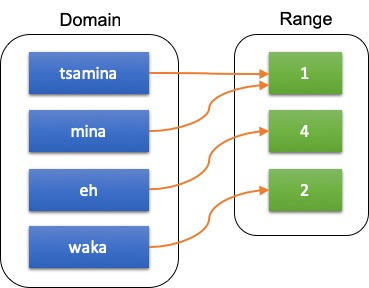

## Dictionaries
`{"tsamina": 1, "mina": 1, "eh": 4, "waka": 2}`
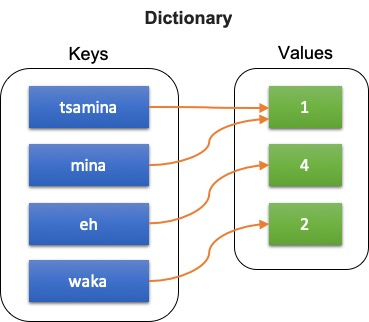

### Working with Dictionaries

In [78]:
d = {"duck": 2, "go": 1}

In [79]:
d["duck"]

2

In [80]:
d["back"]

KeyError: 'back'

In [81]:
"back" in d

False

### Working with Dictionaries

In [82]:
d["duck"] = 3
d

{'duck': 3, 'go': 1}

In [83]:
d["back"] = 4
d

{'duck': 3, 'go': 1, 'back': 4}

In [84]:
del d["go"]
d

{'duck': 3, 'back': 4}

In [85]:
d.keys()

dict_keys(['duck', 'back'])

In [86]:
d.values()

dict_values([3, 4])

### Working with Dictionaries

In [87]:
d["mock"] = "Some String!"
d

{'duck': 3, 'back': 4, 'mock': 'Some String!'}

In [88]:
d[45] = True
d

{'duck': 3, 'back': 4, 'mock': 'Some String!', 45: True}

In [89]:
d[['a', 'list']] = 12

TypeError: unhashable type: 'list'

Dictionary keys must be **immutable**:
* allowed: Numbers, Strings, Tuples
* not allowed: Lists, Dictionaries

## Counting Unigrams

In [90]:
def unigram_freq(text):
    words = tokenize(text)
    freq = {}              # empty dictionary
    for unigram in words:
        if unigram in freq:
            freq[unigram] += 1
        else:
            freq[unigram] = 1
    return freq

In [91]:
unigram_freq("tsamina mina eh eh waka waka eh eh")

{'tsamina': 1, 'mina': 1, 'eh': 4, 'waka': 2}

## Back to Bigrams...

### Question: How to represent bigrams?

Options:
* Lists of length two: `["pickled", "peppers"]`
* Tuples: `("pickled", "peppers")`

### Tuples
Tuple Basics:
```python
key = (lastname, firstname)
lastname = key[0]
point = x, y, z             # parentheses are optional
singleton = (1,)            # trailing comma is OK!
empty = ()
```

Tuples are **immutable** (unlike lists):

In [92]:
key = ("Hamidi", "Minoo")
key[0] = "Hamidian"

TypeError: 'tuple' object does not support item assignment

### Counting Bigam Frequencies

In [93]:
def bigram_freq(s):
    tokens = tokenize(s)
    result = {}
    for i in range(len(tokens)-1): # coule have been written using enumerate
        bigram = (tokens[i], tokens[i+1])
        if not bigram in result:
            result[bigram] = 1
        else:
            result[bigram] = result[bigram] + 1
    return result

In [94]:
print(rhyme)
bigram_freq(rhyme)


Peter Piper picked a peck of pickled peppers;  
A peck of pickled peppers Peter Piper picked.  
If Peter Piper picked a peck of pickled peppers,  
Where’s the peck of pickled peppers Peter Piper picked?



{('peter', 'piper'): 4,
 ('piper', 'picked'): 4,
 ('picked', 'a'): 2,
 ('a', 'peck'): 3,
 ('peck', 'of'): 4,
 ('of', 'pickled'): 4,
 ('pickled', 'peppers'): 4,
 ('peppers', 'a'): 1,
 ('peppers', 'peter'): 2,
 ('picked', 'if'): 1,
 ('if', 'peter'): 1,
 ('peppers', 'where’s'): 1,
 ('where’s', 'the'): 1,
 ('the', 'peck'): 1}

## Step 3. Construct a (Simple) Language Model
```
'peter' ==> {'piper': 1}
'picked' ==> {'peter': 0.25, 'a': 0.5, 'if': 0.25}
...
```

## Choosing the Data Structure
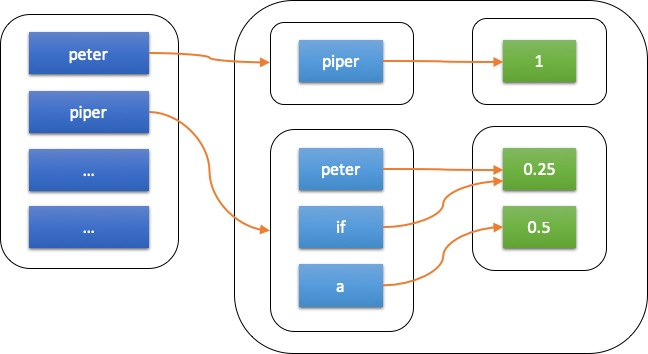

### Calculating Frequencies

In [110]:
# This code has an error
def construct_model(text):
    model = dict.fromkeys(tokenize(text), {})
    bi_freqs = bigram_freq(text)
    for bigram in bi_freqs:
        model[bigram[0]][bigram[1]] = bi_freqs[bigram]
    return model

In [112]:
construct_model(rhyme)

{'peter': {'piper': 4,
  'picked': 4,
  'a': 1,
  'peck': 1,
  'of': 4,
  'pickled': 4,
  'peppers': 4,
  'peter': 1,
  'if': 1,
  'where’s': 1,
  'the': 1},
 'piper': {'piper': 4,
  'picked': 4,
  'a': 1,
  'peck': 1,
  'of': 4,
  'pickled': 4,
  'peppers': 4,
  'peter': 1,
  'if': 1,
  'where’s': 1,
  'the': 1},
 'picked': {'piper': 4,
  'picked': 4,
  'a': 1,
  'peck': 1,
  'of': 4,
  'pickled': 4,
  'peppers': 4,
  'peter': 1,
  'if': 1,
  'where’s': 1,
  'the': 1},
 'a': {'piper': 4,
  'picked': 4,
  'a': 1,
  'peck': 1,
  'of': 4,
  'pickled': 4,
  'peppers': 4,
  'peter': 1,
  'if': 1,
  'where’s': 1,
  'the': 1},
 'peck': {'piper': 4,
  'picked': 4,
  'a': 1,
  'peck': 1,
  'of': 4,
  'pickled': 4,
  'peppers': 4,
  'peter': 1,
  'if': 1,
  'where’s': 1,
  'the': 1},
 'of': {'piper': 4,
  'picked': 4,
  'a': 1,
  'peck': 1,
  'of': 4,
  'pickled': 4,
  'peppers': 4,
  'peter': 1,
  'if': 1,
  'where’s': 1,
  'the': 1},
 'pickled': {'piper': 4,
  'picked': 4,
  'a': 1,
  'peck':

### References in Python
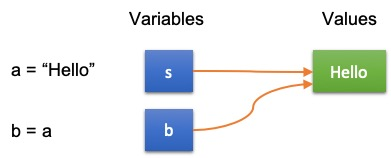

For mutable objects (like strings), this makes no problem.

### Shared References to Mutable Objects
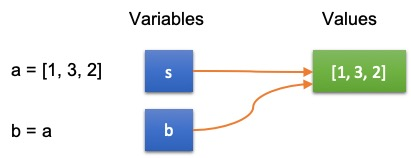

In [97]:
a = [1, 3, 2]
b = a
b[0] = 4
print(a)

[4, 3, 2]


In [98]:
a = [1, 3, 2]
b = a.copy()
b[0] = 4
print(a)

[1, 3, 2]


### The Problem with Our Code
```Python
model = dict.fromkeys(tokenize(text), {})
```
<img src="./images/lang-bug-1.jpg"/>

### The Problem with Our Code
```Python
model = dict.fromkeys(tokenize(text), {})
```
<img src="./images/lang-bug-2.jpg"/>

### Fixing the Problem
Instead of
```Python
model = dict.fromkeys(tokenize(text), {})
```

We write
```Python
model = dict.fromkeys(tokenize(text))
for word in model:
    model[word] = {}
```

**Each time Python interpreter encounters `{}`, it creates a *new* empty dictionary.**

## The New Code

In [113]:
def construct_model(text):
    model = dict.fromkeys(tokenize(text))
    for word in model:
        model[word] = {}
    bi_freqs = bigram_freq(text)
    for bigram in bi_freqs:
        model[bigram[0]][bigram[1]] = bi_freqs[bigram]
    return model 

In [322]:
a = ["one", "two"]
d = { word: {} for word in a}
d

{'one': {}, 'two': {}}

In [323]:
d['one']['a'] = 23
d

{'one': {'a': 23}, 'two': {}}

In [324]:
def construct_model(text):
    model = { word: {} for word in tokenize(text) }
    bi_freqs = bigram_freq(text)
    for bigram in bi_freqs:
        model[bigram[0]][bigram[1]] = bi_freqs[bigram]
    return model 

In [325]:
construct_model(rhyme)

{'peter': {'piper': 4},
 'piper': {'picked': 4},
 'picked': {'a': 2, '.': 1},
 'a': {'peck': 3},
 'peck': {'of': 4},
 'of': {'pickled': 4},
 'pickled': {'peppers': 4},
 'peppers': {'a': 1, 'peter': 2, 'wheres': 1},
 '.': {'if': 1},
 'if': {'peter': 1},
 'wheres': {'the': 1},
 'the': {'peck': 1}}

```Python
def tokenize(s):
    words = s.split()
    result = []
    for word in words:
        result.append(word.rstrip(";.,?!").lower())
    return result

def bigram_freq(s):
    tokens = tokenize(s)
    result = {}
    for i in range(len(tokens)-1):
        bigram = (tokens[i], tokens[i+1])
        if not bigram in result:
            result[bigram] = 1
        else:
            result[bigram] = result[bigram] + 1
    return result

def construct_model(text):
    model = dict.fromkeys(tokenize(text))
    for word in model:
        model[word] = {}
    bi_freqs = bigram_freq(text)
    for bigram in bi_freqs:
        model[bigram[0]][bigram[1]] = bi_freqs[bigram]
    return model 
```

## Lambda Expression

In [307]:
def twice(x):
    return 2 * x

def apply(sequence, operation):
    result = []
    for element in sequence:
        result.append(operation(element))
    return result

apply([2, 4, 3], twice)

[4, 8, 6]

In [308]:
def apply(sequence, operation):
    return [operation(element) for element in sequence]

apply([2, 4, 3], twice)

[4, 8, 6]

In [310]:
apply([2, 4, 3], lambda x: 2 * x)

[4, 8, 6]

In [326]:
grades = [
    ("Gholam", 12, 14.5),
    ("Ghamar", 15.2, 18.5),
    ("Ghamar", 14.2, 18.5),
    ("Gholi", 9, 8.5)
]
grades.sort()
grades

[('Ghamar', 14.2, 18.5),
 ('Ghamar', 15.2, 18.5),
 ('Gholam', 12, 14.5),
 ('Gholi', 9, 8.5)]

In [314]:
grades.sort(key = lambda st: st[2])
grades

[('Gholi', 9, 8.5), ('Gholam', 12, 14.5), ('Ghamar', 15.2, 18.5)]

In [328]:
grades = [
    ("Gholam", 12, 14.5),
    ("Ghodrat", 15.2, 18.5),
    ("Ghamar", 16.2, 18.5),
    ("Gholi", 9, 8.5)
]

grades.sort(key=lambda st: (st[2], -st[1]), reverse=True)
grades

[('Ghodrat', 15.2, 18.5),
 ('Ghamar', 16.2, 18.5),
 ('Gholam', 12, 14.5),
 ('Gholi', 9, 8.5)]